# Models


# Model 4

- get_dummies categorical data(`EDUCATION`,`MARRIAGE`,`SEX`,'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6').
- exclude features `BILL_ATM2`, ..., `BILL_ATM6`.

## Import libraries/packages 

In [1]:
### General libraries ###
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import graphviz 
from graphviz import Source
from IPython.display import SVG
import os

##################################

### ML Models ###
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree.export import export_text
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler,LabelEncoder

##################################

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

### Metrics ###
from yellowbrick.classifier import ConfusionMatrix
from sklearn import metrics
from sklearn.metrics import f1_score,confusion_matrix, mean_squared_error, mean_absolute_error, classification_report, roc_auc_score, roc_curve, precision_score, recall_score

## Part 1: Load and clean the data

In this section we will load the data from the csv file and check for any "impurities", such as null values or duplicate rows. If any of these will appear, we will remove them from the data set. We will also plot the correlations of the class column with all the other columns.

In [2]:
# Load the data.
data = pd.read_csv('default of credit card clients.csv')

# Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_1        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
dpnm         30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


Since the `ID` column is for indexing purposes only, we remove it from the data set.

In [3]:
# Replace value '0' with value '3'.
data['MARRIAGE'] = data['MARRIAGE'].replace(0, 3)

# Replace values '0','5' and '6' with value '4'.
data['EDUCATION'] = data['EDUCATION'].replace([0, 5, 6], 4)

In [4]:
# Drop "ID" column.
data = data.drop(['ID'], axis=1)

Now we check for duplicate rows. If any, we remove them from the data set, since they provide only reduntant information.

In [5]:
# Check for duplicate rows.
print(f"There are {data.duplicated().sum()} duplicate rows in the data set.")

# Remove duplicate rows.
data = data.drop_duplicates()
print("The duplicate rows were removed.")

There are 35 duplicate rows in the data set.
The duplicate rows were removed.


We also check for null values.

In [6]:
# Check for null values.
print(
    f"There are {data.isna().any().sum()} cells with null values in the data set.")

There are 0 cells with null values in the data set.


Below is the plot of the correlation matrix for the data set.

## Part 2: Pre-processing

In this part we prepare our data for our models. This means that we choose the columns that will be our independed variables and which column the class that we want to predict. Once we are done with that, we split our data into train and test sets and perfom a standardization upon them.

In [7]:
# OneHot encoder for columns 'EDUCATION','MARRIAGE','SEX','PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6' .
data = pd.get_dummies(
    data, columns=['EDUCATION','MARRIAGE','SEX','PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])

In [8]:
# Select feature and class column.
X = data.drop(columns=['dpnm', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'])
y = data['dpnm']

In [9]:
for col in X.columns:
    if X[col].any()<0:
        print(f'X[{col}]')

In [10]:
len(X.columns)


82

## Feature selection

In [11]:
from sklearn.feature_selection import RFE

In [12]:
# Initialize a Logistic Regression estimator.
logreg = LogisticRegression(multi_class='auto', random_state=25, n_jobs=-1)

# Train the estimator.
# logreg.fit(X_train, y_train)

In [13]:
selector = RFE(logreg, 5, step=1)

In [14]:
selector = selector.fit(X, y)

In [15]:
selector.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False])

In [16]:
selector.ranking_

array([63, 57, 65, 58, 59, 61, 60, 62, 64, 43, 33, 32,  2, 53, 35, 54, 51,
       31,  6,  7,  5, 24,  1,  1,  1, 66, 68,  8, 49, 30, 52, 17, 74, 19,
       18, 27, 14,  1, 15, 76, 37, 29, 41, 75, 12, 13, 36, 23, 10, 16, 71,
       38, 50, 55, 72, 26, 28, 22, 11, 78, 56, 77, 39, 34, 40,  4, 48, 25,
       47, 69,  3, 73, 45, 21, 20, 46,  1, 42, 67,  9, 44, 70])

In [17]:
X_new=selector.transform(X)
X_new = pd.DataFrame(X_new, index=None)

## Perform K-means clustering analysis

In [18]:
model = KMeans(n_clusters=2, random_state=45).fit(X_new) # na do kai gia k=4

X_new['cluster'] = model.labels_

## Perform PCA

In [19]:
# Split to train and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X_new, y, test_size=0.3, random_state=25)

In [20]:
# Standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Part 3: Modeling

In this section we build and try 3 models:
 - Logistic Regression
 - Decision tree
 - Neural network



## Logistic Regression

In [21]:
# Initialize a Logistic Regression estimator.
logreg = LogisticRegression(multi_class='auto', random_state=25, n_jobs=-1)

# Train the estimator.
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=25,
                   solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [22]:
# Make predictions.
log_pred = logreg.predict(X_test)

# CV accuracy
cv_logreg = cross_val_score(logreg, X, y, cv=10).mean()

## Metrics

In [23]:
# Accuracy: 1 is perfect prediction.
print('Accuracy: %.3f' % logreg.score(X_test, y_test))

# Cross-Validation accuracy
print('Cross-validation accuracy: %0.3f' % cv_logreg)

# Precision
print('Precision: %.3f' % precision_score(y_test, log_pred))

# Recall
print('Recall: %.3f' % recall_score(y_test, log_pred))

# f1 score: best value at 1 (perfect precision and recall) and worst at 0.
print('F1 score: %.3f' % f1_score(y_test, log_pred))

Accuracy: 0.816
Cross-validation accuracy: 0.779
Precision: 0.692
Recall: 0.322
F1 score: 0.440


In [24]:
# Predict probabilities for the test data.
logreg_probs = logreg.predict_proba(X_test)

# Keep Probabilities of the positive class only.
logreg_probs = logreg_probs[:, 1]

# Compute the AUC Score.
auc_logreg = roc_auc_score(y_test, logreg_probs)
print('AUC: %.2f' % auc_logreg)

AUC: 0.64


## Confusion matrix for Logistic Regression

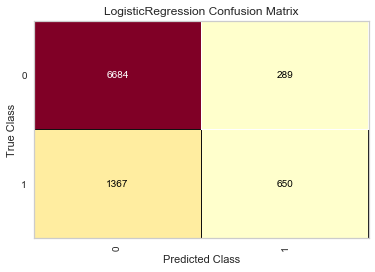

In [25]:
cm = ConfusionMatrix(logreg, is_fitted=True)
cm.score(X_test, y_test)
cm.poof()

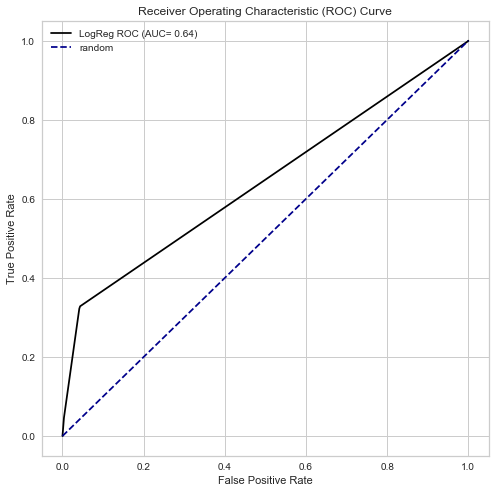

In [26]:
# Get the ROC curves.
logreg_fpr, logreg_tpr, logreg_thresholds = roc_curve(y_test, logreg_probs)

# Plot the ROC curves.
plt.figure(figsize=(8, 8))
plt.plot(logreg_fpr, logreg_tpr, color='black',
         label='LogReg ROC (AUC= %0.2f)' % auc_logreg)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Decision tree

In [27]:
# Initialize a decision tree estimator.
tr = tree.DecisionTreeClassifier(
    max_depth=3, criterion='gini', random_state=25)

# Train the estimator.
tr.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=25, splitter='best')

Text(0.5, 1.0, 'Decision Tree')

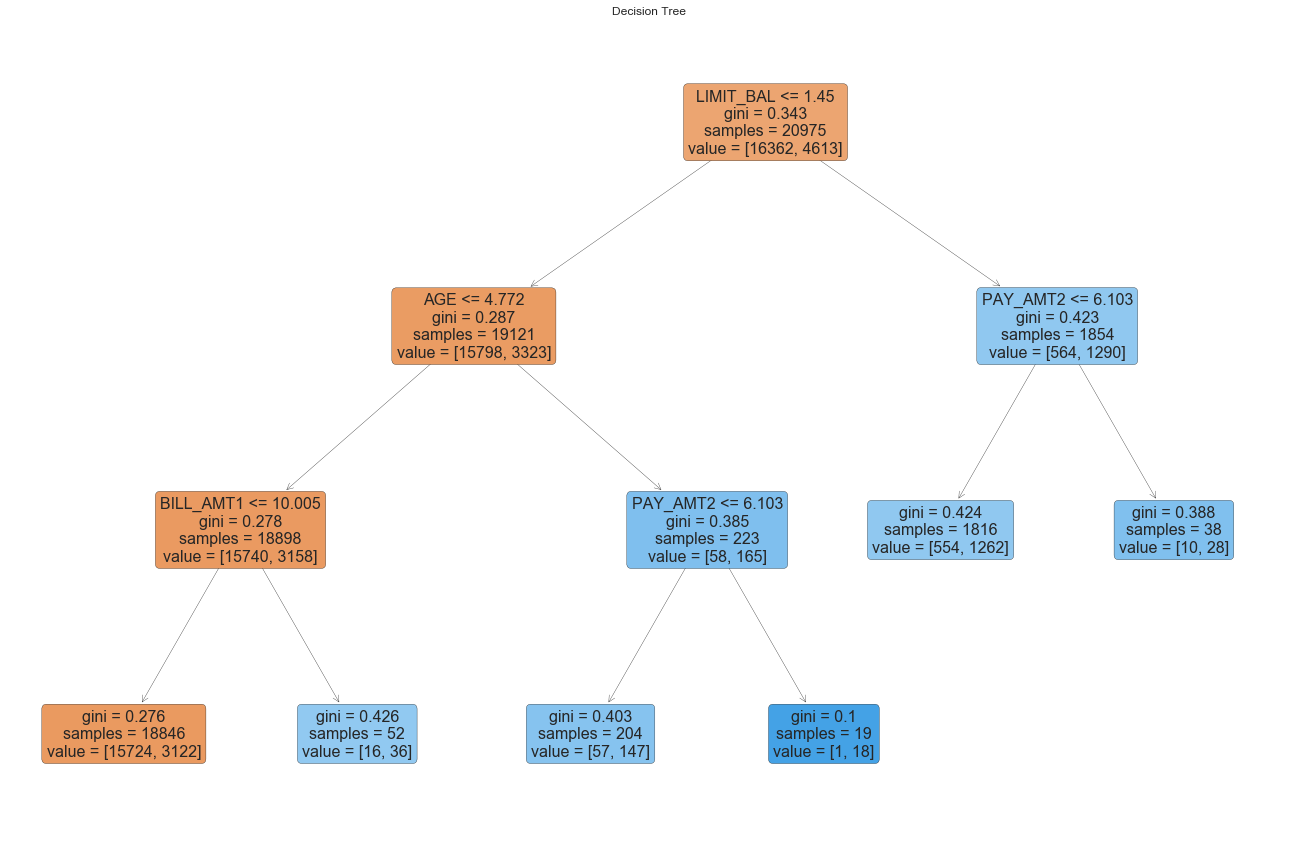

In [28]:
# Plot the tree.
fig = plt.figure(figsize=(23, 15))
tree.plot_tree(tr.fit(X_train, y_train), feature_names=X.columns,
               filled=True, rounded=True, fontsize=16)
plt.title('Decision Tree')

In [29]:
# Print the tree in a simplified version.
r = export_text(tr, feature_names=X.columns.tolist())
print(r)

ValueError: feature_names must contain 6 elements, got 82

In [ ]:
# Make predictions.
tr_pred = tr.predict(X_test)

# CV accuracy.
cv_tr = cross_val_score(tr, X, y, cv=10).mean()

## Metrics

In [ ]:
# Accuracy: 1 is perfect prediction.
print('Accuracy: %.3f' % tr.score(X_test, y_test))

# Cross-Validation accuracy
print('Cross-validation accuracy: %0.3f' % cv_tr)

# Precision
print('Precision: %.3f' % precision_score(y_test, tr_pred))

# Recall
print('Precision: %.3f' % recall_score(y_test, tr_pred))

# f1 score: best value at 1 (perfect precision and recall) and worst at 0.
print('F1 score: %.3f' % f1_score(y_test, tr_pred))

In [ ]:
# Predict propabilities for the test data.
tr_probs = tr.predict_proba(X_test)

# Keep Probabilities of the positive class only.
tr_probs = tr_probs[:, 1]

# Compute the AUC Score.
auc_tr = roc_auc_score(y_test, tr_probs)
print('AUC: %.2f' % auc_tr)

## Confusion Matrix for Decision tree

In [ ]:
cm = ConfusionMatrix(tr, is_fitted=True)
cm.score(X_test, y_test)
cm.poof()

In [ ]:
# Get the ROC Curves.
tr_fpr, tr_tpr, tr_thresholds = roc_curve(y_test, tr_probs)

# Plot the ROC curves.
plt.figure(figsize=(8, 8))
plt.plot(tr_fpr, tr_tpr, color='red',
         label='Decision tree ROC (AUC= %0.2f)' % auc_tr)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()

## Neural network

In [30]:
# Initialize a Multi-layer Perceptron classifier.
mlp = MLPClassifier(hidden_layer_sizes=(12, 5), max_iter=1000,
                    random_state=25, shuffle=True, verbose=False)

# Train the classifier.
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(12, 5), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=25, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [31]:
# Make predictions.
mlp_pred = mlp.predict(X_test)

# CV accuracy
cv_mlp = cross_val_score(mlp, X, y, cv=10).mean()

## Metrics

In [32]:
# Accuracy: 1 is perfect prediction.
print('Accuracy: %.3f' % mlp.score(X_test, y_test))

# Cross-Validation accuracy
print('Cross-validation accuracy: %0.3f' % cv_mlp)

# Precision
print('Precision: %.3f' % precision_score(y_test, mlp_pred))

# Recall
print('Recall: %.3f' % recall_score(y_test, mlp_pred))

# f1 score: best value at 1 (perfect precision and recall) and worst at 0.
print('F1 score: %.3f' % f1_score(y_test, mlp_pred))

Accuracy: 0.816
Cross-validation accuracy: 0.722
Precision: 0.686
Recall: 0.328
F1 score: 0.444


In [33]:
# Predict probabilities for the test data.
mlp_probs = mlp.predict_proba(X_test)

# Keep probabilities of the positive class only.
mlp_probs = mlp_probs[:, 1]

# Compute the AUC Score.
auc_mlp = roc_auc_score(y_test, mlp_probs)
print('AUC: %.2f' % auc_mlp)

AUC: 0.64


## Confusion Matrix for Multi-layer Perceptron

In [ ]:
cm = ConfusionMatrix(mlp, is_fitted=True)
cm.score(X_test, y_test)
cm.poof()

In [ ]:
# Get the ROC curves.
mlp_fpr, mlp_tpr, mlp_thresholds = roc_curve(y_test, mlp_probs)

# Plot the ROC curve.
plt.figure(figsize=(8, 8))
plt.plot(mlp_fpr, mlp_tpr, color='red', label='MLP ROC (AUC= %0.2f)' % auc_mlp)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Results

In [ ]:
metrics = ['Accuracy', 'CV accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC']

# Plot metrics.
fig = go.Figure(data=[
    go.Bar(name='Logistic Regression', x=metrics,
           y=[logreg.score(X_test, y_test), cv_logreg, precision_score(y_test, log_pred), recall_score(y_test, log_pred), f1_score(y_test, log_pred), auc_logreg]),
    go.Bar(name='Decision tree', x=metrics,
           y=[tr.score(X_test, y_test), cv_tr, precision_score(y_test, tr_pred), recall_score(y_test, tr_pred), f1_score(y_test, tr_pred), auc_tr]),
    go.Bar(name='Neural Network', x=metrics,
           y=[mlp.score(X_test, y_test), cv_mlp, precision_score(y_test, mlp_pred), recall_score(y_test, mlp_pred), f1_score(y_test, mlp_pred), auc_mlp]),
])

fig.update_layout(title_text='Metrics for each model',
                  barmode='group', xaxis_tickangle=-45, bargroupgap=0.05)
fig.show()

In [ ]:
# Plot the ROC curve.
plt.figure(figsize=(8, 8))
plt.plot(mlp_fpr, mlp_tpr, color='blue',
         label='MLP ROC (AUC= %0.3f)' % auc_mlp)
plt.plot(tr_fpr, tr_tpr, color='green',
         label='Decision tree ROC (AUC= %0.3f)' % auc_tr)
plt.plot(logreg_fpr, logreg_tpr, color='red',
         label='LogReg ROC (AUC= %0.3f)' % auc_logreg)
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()

In [ ]:
d = {
    '': ['Logistic Regression', 'Decision Tree', 'Neural Network (MLP)'],
    'Accuracy': [logreg.score(X_test, y_test), tr.score(X_test, y_test), mlp.score(X_test, y_test)],
    'CV Accuracy': [cv_logreg, cv_tr, cv_mlp],
    'Precision': [precision_score(y_test, log_pred), precision_score(y_test, tr_pred), precision_score(y_test, mlp_pred)],
    'Recall': [recall_score(y_test, log_pred), recall_score(y_test, tr_pred), recall_score(y_test, mlp_pred)],
    'F1': [f1_score(y_test, log_pred), f1_score(y_test, tr_pred), f1_score(y_test, mlp_pred)],
    'AUC': [auc_logreg, auc_tr, auc_mlp]
}

results = pd.DataFrame(data=d).round(3).set_index('')
results

## Paper results


### 1) The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications 36 (2009) 2473–2480

|                     | Error rate | Accuracy |
|---------------------|:----------:|:--------:|
| Logistic Regression |    0.18    |   0.82   |
| Decision tree       |    0.17    |   0.83   |
| Neural Network      |    0.17    |   0.83   |

### 2) Liu,  R.L.  (2018) Machine  Learning  Approaches  to  Predict Default  of  Credit  Card  Clients. Modern Economy, 9, 1828-1838. 

|                | Accuracy |   F1   |
|----------------|:--------:|:------:|
|  Decision tree |  0.7973  | 0.4912 |
| Neural Network |  0.8227  | 0.4593 |